In [144]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from PIL import Image 
import scipy.ndimage as ndi
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from keras.utils.vis_utils import plot_model

In [152]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

## Chargement images

In [3]:
train_dir = 'data/Training'
test_dir = 'data/Testing'

In [4]:
filenames_training = [name for name in os.listdir(train_dir)]
filenames_training

['glioma', 'meningioma', 'notumor', 'pituitary']

In [5]:
list_images = [[name for name in os.listdir(train_dir+"/"+cancer_type)] for cancer_type in filenames_training ]

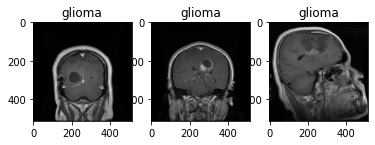

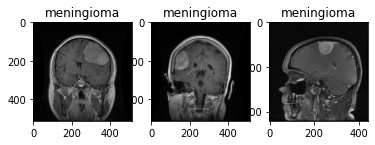

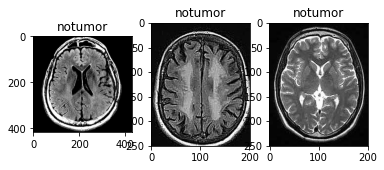

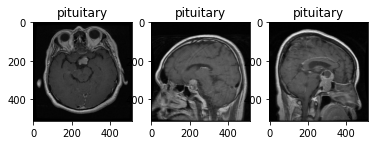

In [6]:
for cancer in filenames_training:
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        randomImageTRAINCOVID = random.choice(os.listdir(train_dir + '/' + cancer))
        plt.imshow(plt.imread(os.path.join( train_dir + '/' + cancer,randomImageTRAINCOVID)), cmap='gray')
        plt.title(cancer)
    plt.show()

## Premiere visualisation

## Premier modele CNN

In [10]:
# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import seaborn as sns
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [7]:
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
img_size = 512

def get_data(data_dir):
    data = [] 
    for label in labels:
        i=0
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            if i<200:
                try:
                    img_arr = cv2.imread(os.path.join(path, img))
                    resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                    data.append([resized_arr, class_num])
                except Exception as e:
                    print(e)
                i+=1
    return np.array(data)

In [8]:
train = get_data('data/Training')
val = get_data('data/Testing')

C:\Users\marti\AppData\Local\Temp\ipykernel_15688\1062521773.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


C:\Users\marti\anaconda3\envs\covid_cough\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

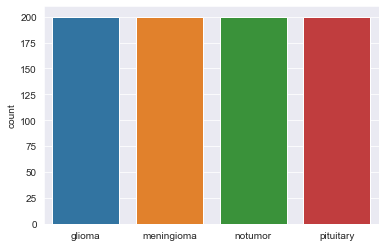

In [11]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("glioma")
    if(i[1] == 1):
        l.append("meningioma")
    if(i[1] == 2):
        l.append("notumor")
    if(i[1] == 3):
        l.append("pituitary")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'glioma')

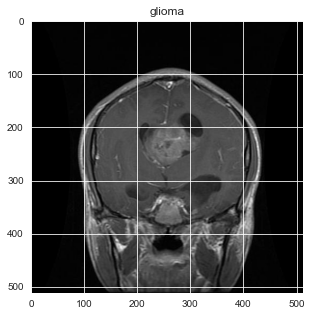

In [12]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'pituitary')

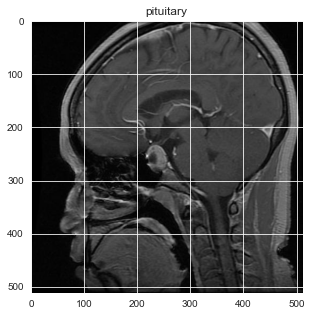

In [13]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [14]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)
    
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [15]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(512,512,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 512, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0

In [16]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss ='sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [17]:
ep = 10
history = model.fit(x_train,y_train,epochs = ep , validation_data = (x_val, y_val))

Epoch 1/15
25/25 [==============================] - 168s 6s/step - loss: 1.3779 - accuracy: 0.2863 - val_loss: 1.3642 - val_accuracy: 0.2750
Epoch 2/15
25/25 [==============================] - 146s 6s/step - loss: 1.3217 - accuracy: 0.4337 - val_loss: 1.3514 - val_accuracy: 0.2862
Epoch 3/15
25/25 [==============================] - 140s 6s/step - loss: 1.2854 - accuracy: 0.4603 - val_loss: 1.3390 - val_accuracy: 0.3275
Epoch 4/15
25/25 [==============================] - 140s 6s/step - loss: 1.2361 - accuracy: 0.5202 - val_loss: 1.3272 - val_accuracy: 0.3300
Epoch 5/15
25/25 [==============================] - 143s 6s/step - loss: 1.1895 - accuracy: 0.5562 - val_loss: 1.3204 - val_accuracy: 0.3325
Epoch 6/15
25/25 [==============================] - 137s 6s/step - loss: 1.1537 - accuracy: 0.5576 - val_loss: 1.3169 - val_accuracy: 0.3550
Epoch 7/15
25/25 [==============================] - 137s 6s/step - loss: 1.1127 - accuracy: 0.5899 - val_loss: 1.3127 - val_accuracy: 0.3575
Epoch 8/15
25

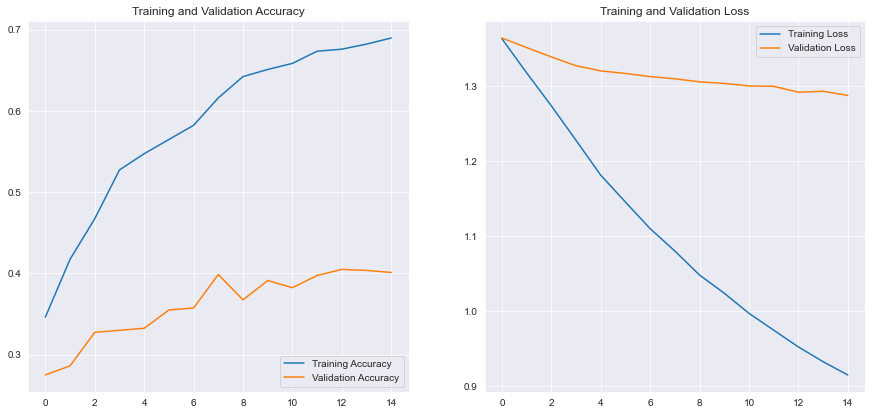

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modèle moyenne / median

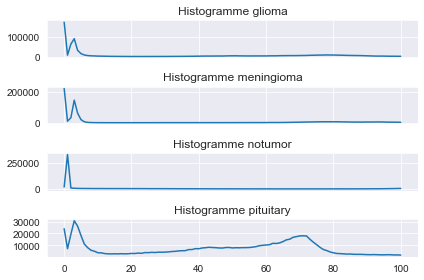

In [58]:
hist_glioma = ndi.histogram(train[2][0], min=0, max=100, bins=101)
hist_meningioma = ndi.histogram(train[250][0], min=0, max=100, bins=101)
hist_notumor = ndi.histogram(train[500][0], min=0, max=100, bins=101)
hist_pituitary = ndi.histogram(train[680][0], min=0, max=100, bins=101)
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

fig, axes = plt.subplots(4, 1, sharex=True)
axes[0].plot(hist_glioma);
axes[0].set_title("Histogramme glioma")
axes[1].plot(hist_meningioma);
axes[1].set_title("Histogramme meningioma")
axes[2].plot(hist_notumor);
axes[2].set_title("Histogramme notumor")
axes[3].plot(hist_pituitary);
axes[3].set_title("Histogramme pituitary")
fig.tight_layout()
plt.show()

In [82]:
def mean_image(liste):
    list_mean = [np.mean(image[0]) for image in liste]
    list_median = [np.median(image[0]) for image in liste]
    label = [image[1] for image in liste]
    return list_mean, list_median, label

In [83]:
list_mean, list_median, list_label = mean_image(train)
df = pd.DataFrame(list(zip(list_mean,list_median, list_label)), columns = ['mean','median','label'])
df

,mean,median,label
0,31.387234,4.0,0
1,37.844910,5.0,0
2,36.035866,7.0,0
3,24.906197,12.0,0
4,32.082684,24.0,0
...,...,...,...
795,49.903240,54.0,3
796,45.479244,52.0,3
797,53.209530,61.0,3
798,50.953030,59.0,3


In [101]:
model_mean = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(df[['mean']], df['label'], random_state = 0)

In [85]:
model.fit(x_train,y_train)

LogisticRegression()

In [86]:
precision = model.score(x_test,y_test)
print(precision*100)

49.5


In [108]:
model_median = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(df[['median']], df['label'], random_state = 0)

In [109]:
model.fit(x_train,y_train)
precision = model.score(x_test,y_test)
print(precision*100)

41.5


## Troisieme modele

In [110]:
knn_model = KNeighborsRegressor(n_neighbors=3)

In [111]:
knn_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [112]:
a = knn_model.score(x_test, y_test)
print(a)

0.45549027943291076


## Filtre image

In [135]:
def filter_image(img,kernel,seuil=None):
    new_img = np.zeros((np.shape(img)[0],np.shape(img)[1],np.shape(img)[2]))
    for i in range(1,np.shape(img)[0]-1):
        for j in range(1,np.shape(img)[1]-1):
            new_img[i][j] = np.sum(img[i-1:i+2,j-1:j+2,0]*kernel)
            
    if seuil != None:
        new_img[new_img < seuil] = 0
        new_img[new_img>= seuil] = 255
    return new_img.astype(np.uint8)

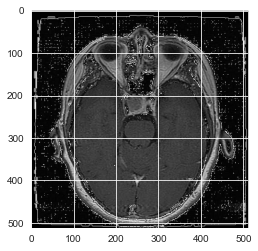

In [166]:
#rehausseur from scratch
filtre_rehausseur = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
resulting_image_glioma = filter_image(train[4][0],filtre_rehausseur)
resulting_image_meningioma = filter_image(train[240][0],filtre_rehausseur)
resulting_image_notumor = filter_image(train[490][0],filtre_rehausseur)
resulting_image_pituitary = filter_image(train[700][0],filtre_rehausseur)

plt.imshow(resulting_image_glioma,);
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

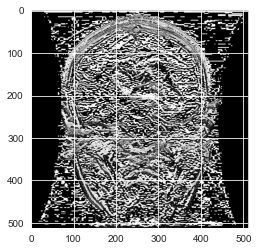

In [168]:
prewitt = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
#rehausseur from scratch
resulting_image = filter_image(train[4][0],prewitt)

plt.imshow(resulting_image,);
plt.show